# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587SP20 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587SP20issues.json

In [1]:
import os

#import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [2]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP20issues.json')]

In [3]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [4]:
# Sanity test: print rows in our DataFrame

issues_df
    

,Author,State,closed_at,created_at,issue_number,labels
0,SPM587SP20,open,None,2020-03-18,27,"[Category:Bug, Category:Inquiry, DetectionPhas..."
1,SPM587SP20,open,None,2020-03-18,26,"[Category:Inquiry, DetectionPhase:Coding, Orig..."
2,SPM587SP20,open,None,2020-03-18,25,"[Category:Inquiry, DetectionPhase:Requirements..."
3,SPM587SP20,open,None,2020-03-18,24,"[Category:Enhancement, Category:Inquiry, Detec..."
4,SPM587SP20,open,None,2020-03-18,23,"[Category:Inquiry, DetectionPhase:Design, Orig..."
5,SPM587SP20,open,None,2020-03-18,22,"[Category:Enhancement, DetectionPhase:Coding, ..."
6,SPM587SP20,open,None,2020-03-05,20,"[Category:Inquiry, DetectionPhase:Testing, Ori..."
7,SPM587SP20,open,None,2020-03-05,19,"[Category:Enhancement, DetectionPhase:Field, O..."
8,SPM587SP20,open,None,2020-03-05,18,"[Category:Inquiry, DetectionPhase:Field, Origi..."
9,SPM587SP20,open,None,2020-03-05,17,"[Category:Bug, DetectionPhase:Field, Originati..."


In [5]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [6]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SPM587SP20,open,None,2020-03-18,27,"[Category:Bug, Category:Inquiry, DetectionPhas...",NaN,NaN,NaN,NaN,NaN
1,SPM587SP20,open,None,2020-03-18,26,"[Category:Inquiry, DetectionPhase:Coding, Orig...",NaN,NaN,NaN,NaN,NaN
2,SPM587SP20,open,None,2020-03-18,25,"[Category:Inquiry, DetectionPhase:Requirements...",NaN,NaN,NaN,NaN,NaN
3,SPM587SP20,open,None,2020-03-18,24,"[Category:Enhancement, Category:Inquiry, Detec...",NaN,NaN,NaN,NaN,NaN
4,SPM587SP20,open,None,2020-03-18,23,"[Category:Inquiry, DetectionPhase:Design, Orig...",NaN,NaN,NaN,NaN,NaN
5,SPM587SP20,open,None,2020-03-18,22,"[Category:Enhancement, DetectionPhase:Coding, ...",NaN,NaN,NaN,NaN,NaN
6,SPM587SP20,open,None,2020-03-05,20,"[Category:Inquiry, DetectionPhase:Testing, Ori...",NaN,NaN,NaN,NaN,NaN
7,SPM587SP20,open,None,2020-03-05,19,"[Category:Enhancement, DetectionPhase:Field, O...",NaN,NaN,NaN,NaN,NaN
8,SPM587SP20,open,None,2020-03-05,18,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
9,SPM587SP20,open,None,2020-03-05,17,"[Category:Bug, DetectionPhase:Field, Originati...",NaN,NaN,NaN,NaN,NaN


In [7]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [8]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SPM587SP20,open,None,2020-03-18,27,"[Category:Bug, Category:Inquiry, DetectionPhas...",Design,Design,Inquiry,High,NaN
1,SPM587SP20,open,None,2020-03-18,26,"[Category:Inquiry, DetectionPhase:Coding, Orig...",Requirements,Coding,Inquiry,Medium,Approved
2,SPM587SP20,open,None,2020-03-18,25,"[Category:Inquiry, DetectionPhase:Requirements...",Requirements,Requirements,Inquiry,Medium,inProgress
3,SPM587SP20,open,None,2020-03-18,24,"[Category:Enhancement, Category:Inquiry, Detec...",Design,Documentation,Inquiry,Low,NaN
4,SPM587SP20,open,None,2020-03-18,23,"[Category:Inquiry, DetectionPhase:Design, Orig...",Design,Design,Inquiry,Major,Completed
5,SPM587SP20,open,None,2020-03-18,22,"[Category:Enhancement, DetectionPhase:Coding, ...",Design,Coding,Enhancement,Major,Completed
6,SPM587SP20,open,None,2020-03-05,20,"[Category:Inquiry, DetectionPhase:Testing, Ori...",Requirements,Testing,Inquiry,Medium,Approved
7,SPM587SP20,open,None,2020-03-05,19,"[Category:Enhancement, DetectionPhase:Field, O...",Field,Field,Enhancement,Low,Completed
8,SPM587SP20,open,None,2020-03-05,18,"[Category:Inquiry, DetectionPhase:Field, Origi...",Documentation,Field,Inquiry,Low,Rejected
9,SPM587SP20,open,None,2020-03-05,17,"[Category:Bug, DetectionPhase:Field, Originati...",Coding,Field,Bug,Major,pendingReview


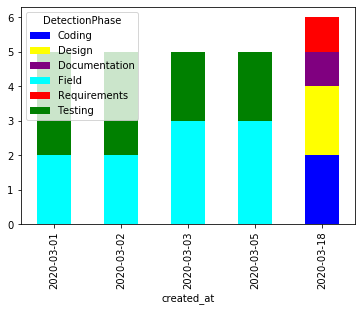

In [9]:
# Plot in Bar Chart the total number of issues created every day for every Detection Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'cyan', 'red', 'green'], grid=False)

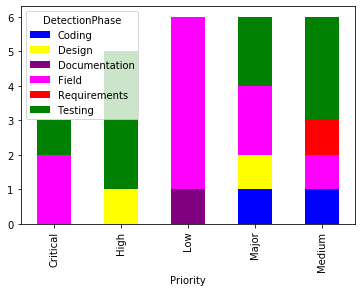

In [10]:
# Plot in Bar Chart the total number of issues created for every Phase based on thier priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'magenta', 'red', 'green'], grid=False)

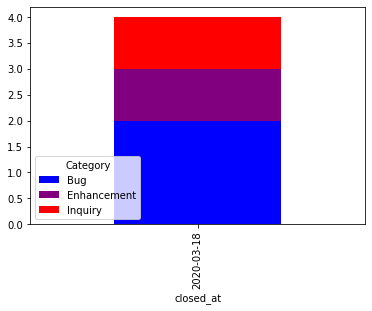

In [11]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase


In [12]:
# Requirement #1: Add your code here



#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status



In [13]:
# Requirement #2: Add your code here

